In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import cv2
from sklearn.metrics import silhouette_score

In [ ]:
#Xây dựng hàm xử lý ảnh :
def XuLyAnh(img):
  #Áp dụng một số bước tiền xử lý phổ biến :
  #Chuyển đổi sang ảnh xám :
  gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  #Làm mịn ảnh bằng bộ lọc Gaussian (Giúp giảm nhiễu và làm mịn ảnh) :
  blurred_img = cv2.GaussianBlur(gray_img,
                                (5, 5),  #Là kích thước của kernel Gaussian
                                 0 #Là tham số sigma, đại diện cho độ đơn giản hóa của hàm Gaussian
                                 )

  #Cân bằng histogram (Để cải thiện độ tương phản của ảnh):
  equalized_img = cv2.equalizeHist(blurred_img)

  #Chuyển đổi giá trị về trong đoạn từ 0 - 1 cho dễ tính toán :
  final_img = equalized_img / 255.0

  #Trả về ảnh đã xử lý :
  return final_img

**Phương pháp Silhouette** là một cách để đánh giá chất lượng của việc gom cụm trong thuật toán KMeans. Nó cung cấp một số đo lường cho độ tách biệt giữa các cụm và đồng nhất bên trong mỗi cụm. Giá trị Silhouette Score được sử dụng để chọn số cụm tối ưu.

**Cách Silhouette Score được tính toán**:
**Độ Tách Biệt (a):** Là khoảng cách trung bình giữa một điểm dữ liệu trong cụm với tất cả các điểm dữ liệu trong cụm đó.

**Đồng Nhất (b):** Là khoảng cách trung bình giữa một điểm dữ liệu trong cụm với tất cả các điểm dữ liệu trong cụm gần nhất (khác cụm hiện tại).

**Silhouette Score (s):** Được tính toán theo công thức s = (b - a) / max(a, b).

**Silhouette Score có giá trị từ -1 đến 1 :**
Một Silhouette Score cao (gần 1) chỉ ra rằng cụm là tách biệt và có đồng nhất tốt.
Một Silhouette Score thấp (gần -1 hoặc 0) chỉ ra rằng cụm không tốt vì có sự chồng lấn hoặc đồng nhất kém.


In [ ]:
#Xây dựng hàm để chọn ra số cụm phù hợp cho ảnh (Dùng phương pháp Silhoutte Score) :
def Silhouette_Score(k_max , img) :
  best_k = None
  max_silhouette_score = -1
  silhouette_scores = []
  #Chọn một khoảng giá trị k thử nghiệm :
  k_values = range(2, k_max + 1)

  for k in k_values:
      kmeans = KMeans(n_clusters=k, n_init = 'auto' ,random_state=42).fit(img)
      silhouette_avg = silhouette_score(img, kmeans.labels_ , metric='euclidean')
      silhouette_scores.append(silhouette_avg)

      if k != 2 and silhouette_avg > max_silhouette_score:
        max_silhouette_score = silhouette_avg
        best_k = k


  #Vẽ biểu đồ Silhouette Scores :
  plt.plot(k_values, silhouette_scores, marker='o')
  plt.xlabel('Cụm')
  plt.ylabel('Silhouette Score')
  plt.title('Biểu đồ Silhoutte Score theo từng cụm')
  plt.show()

  #Trả về cụm tốt nhất :
  print("\nSố cụm tối ưu là :", best_k)
  return best_k

In [ ]:
def PhanVungAnh(image):
  img_result = XuLyAnh(image)
  img_flat = img_result.reshape(-1, 1)

  k_max = int(input('Nhập số lượng cụm tối đa : '))
  so_cum = Silhouette_Score(k_max,img_result)

  model = KMeans(n_clusters = so_cum , n_init='auto' , random_state=42, algorithm='elkan')
  model.fit(img_flat)
  cluster_centers = model.cluster_centers_
  cluster_labels = model.labels_
  print("Giá trị của các cụm trung tâm : \n",cluster_centers)
  print("Labels của các điểm pixel trong ảnh sau khi gom cụm : ",cluster_labels)

  #Tạo ảnh phân vùng :
  segmented_image = cluster_centers[cluster_labels].reshape(img_result.shape)

  #Chuyển đổi giá trị lại thành trong đoạn từ 0 - 255.0 :
  segmented_image = segmented_image * 255.0
  return segmented_image

In [ ]:
def HienThiAnh(img_ori , seg_img) :
  #Hiển thị ảnh gốc và ảnh đã phân vùng  :
  plt.figure(figsize=(18, 6))

  plt.subplot(121)
  plt.imshow(img_ori)
  plt.title("Ảnh gốc")
  plt.axis('off')


  #Hiển thị ảnh đã phân vùng :
  plt.subplot(122)
  plt.imshow(seg_img,cmap = 'gray')
  plt.title(f"Ảnh đã phân vùng")
  plt.axis('off')

  plt.show()

In [ ]:
#Kết nối drive :
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Load ảnh mẫu từ scikit-learn để phân vùng :
#Đường dẫn đến thư mục chứa các file ảnh :
folder_path = '/content/drive/MyDrive/Colab Notebooks/TH_TGMT/Image_TGMT'

#Đọc ảnh trong thư mục :
hinh1 = cv2.imread(folder_path + '/' + 'hinh1.jpg')
hinh2 = cv2.imread(folder_path + '/' + 'hinh2.jpg')
hinh3 = cv2.imread(folder_path + '/' + 'hinh3.jpg')
hinh4 = cv2.imread(folder_path + '/' + 'hinh4.jpg')
hinh5 = cv2.imread(folder_path + '/' + 'hinh5.jpg')

Ảnh phân vùng của hình 1 :

Nhập số lượng cụm tối đa : 20


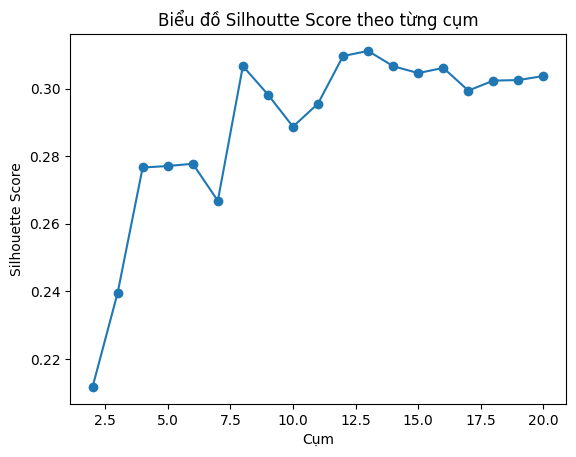


Số cụm tối ưu là : 13
Giá trị của các cụm trung tâm : 
 [[0.18071528]
 [0.74047355]
 [0.42735623]
 [0.96352459]
 [0.58532676]
 [0.03793072]
 [0.34487498]
 [0.82432385]
 [0.50853586]
 [0.26102084]
 [0.89472418]
 [0.66046564]
 [0.10784659]]
Labels của các điểm pixel trong ảnh sau khi gom cụm :  [3 3 3 ... 7 7 7]


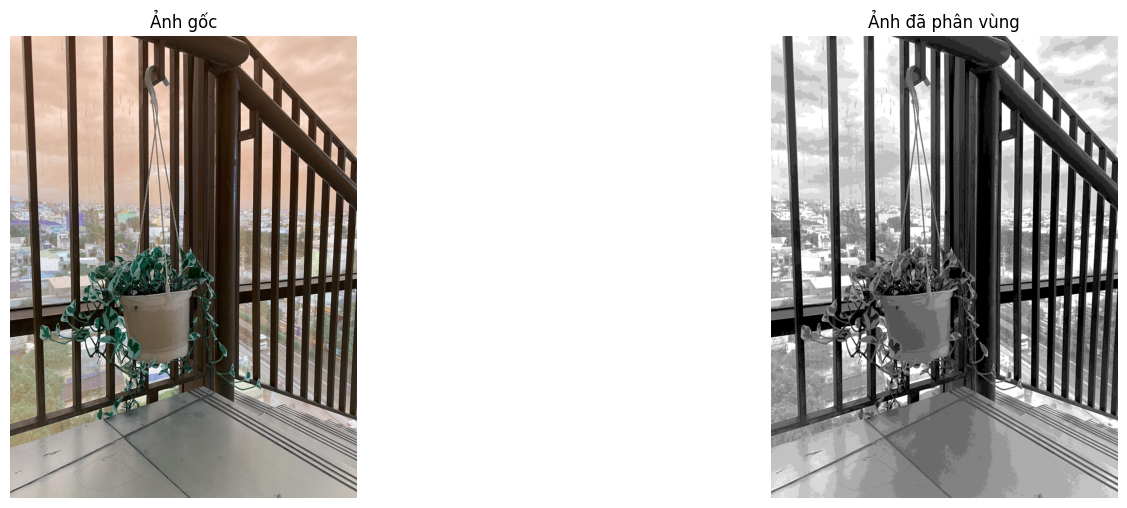


Ảnh phân vùng của hình 2 :

Nhập số lượng cụm tối đa : 20


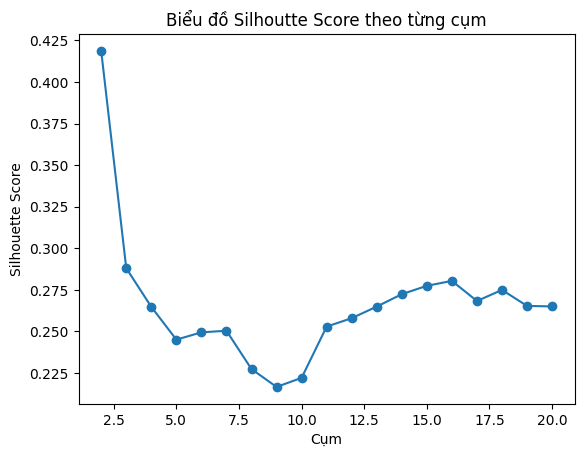


Số cụm tối ưu là : 3
Giá trị của các cụm trung tâm : 
 [[0.8420643 ]
 [0.17488027]
 [0.51615738]]
Labels của các điểm pixel trong ảnh sau khi gom cụm :  [0 0 0 ... 1 1 1]


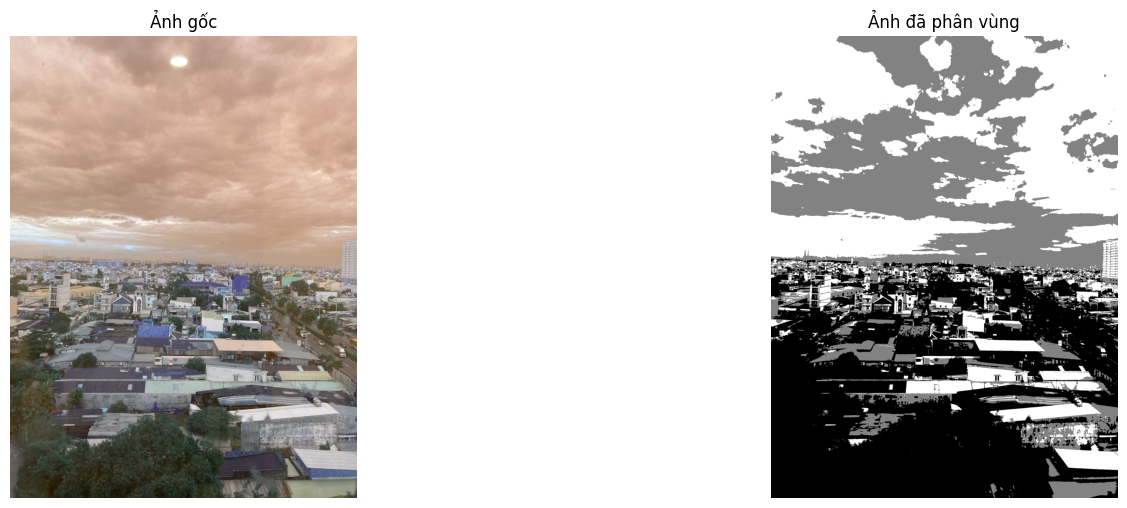


Ảnh phân vùng của hình 3 :

Nhập số lượng cụm tối đa : 20


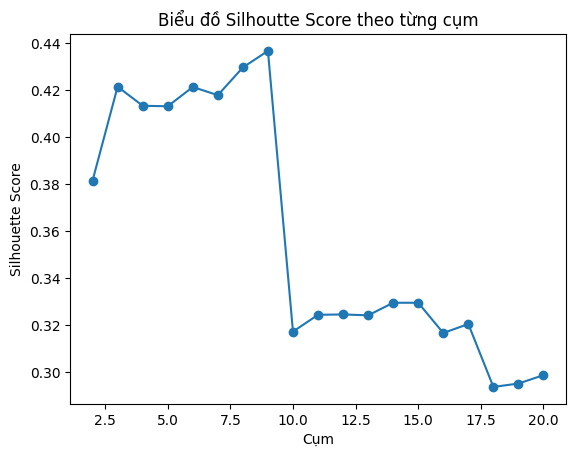


Số cụm tối ưu là : 9
Giá trị của các cụm trung tâm : 
 [[0.23132363]
 [0.82714469]
 [0.47787289]
 [0.04020857]
 [0.59148938]
 [0.9428734 ]
 [0.35189417]
 [0.708116  ]
 [0.12998591]]
Labels của các điểm pixel trong ảnh sau khi gom cụm :  [0 0 0 ... 4 4 4]


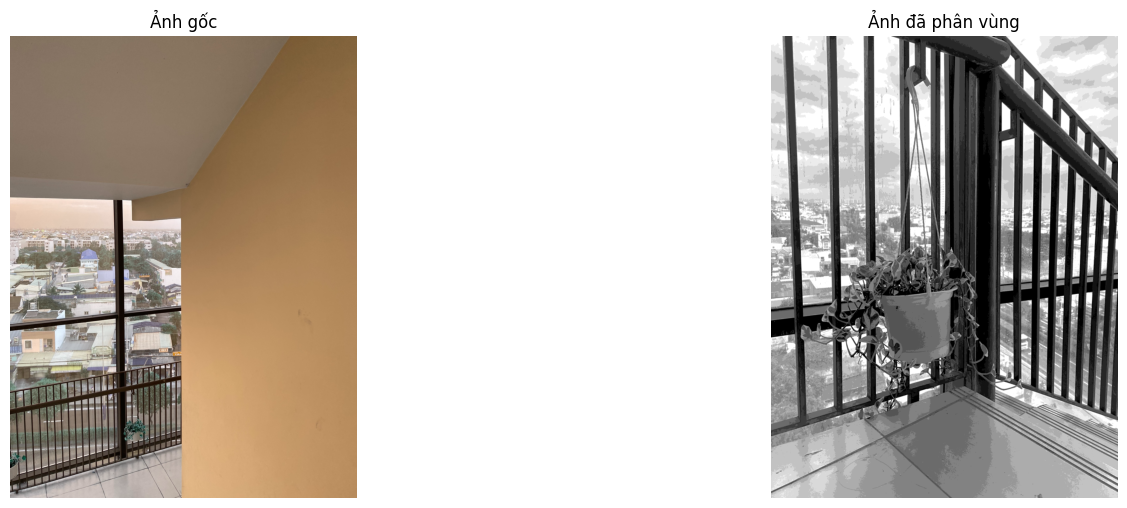


Ảnh phân vùng của hình 4 :

Nhập số lượng cụm tối đa : 20


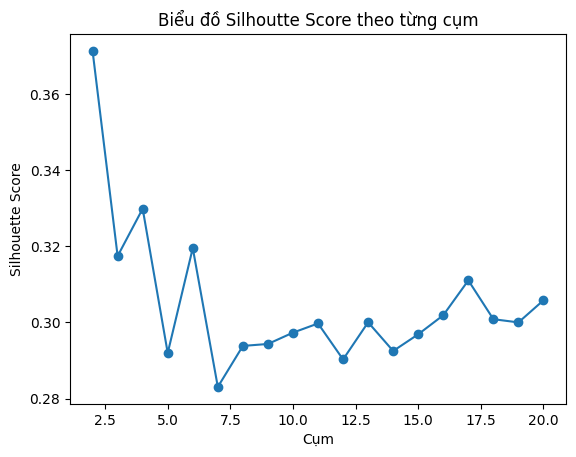


Số cụm tối ưu là : 4
Giá trị của các cụm trung tâm : 
 [[0.87103822]
 [0.36293147]
 [0.61164952]
 [0.12140869]]
Labels của các điểm pixel trong ảnh sau khi gom cụm :  [3 3 3 ... 3 3 3]


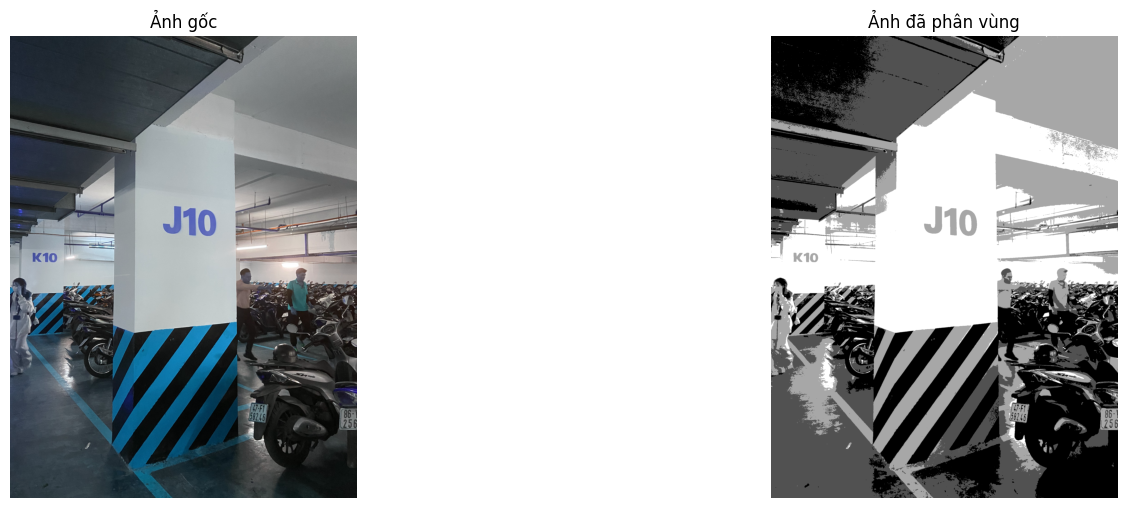


Ảnh phân vùng của hình 5 :

Nhập số lượng cụm tối đa : 20


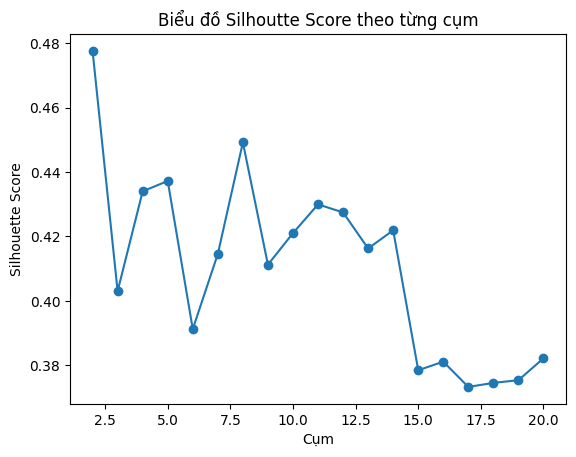


Số cụm tối ưu là : 8
Giá trị của các cụm trung tâm : 
 [[0.4113395 ]
 [0.83402785]
 [0.05750269]
 [0.6932627 ]
 [0.28428646]
 [0.53889158]
 [0.94979043]
 [0.16427513]]
Labels của các điểm pixel trong ảnh sau khi gom cụm :  [1 1 1 ... 3 3 3]


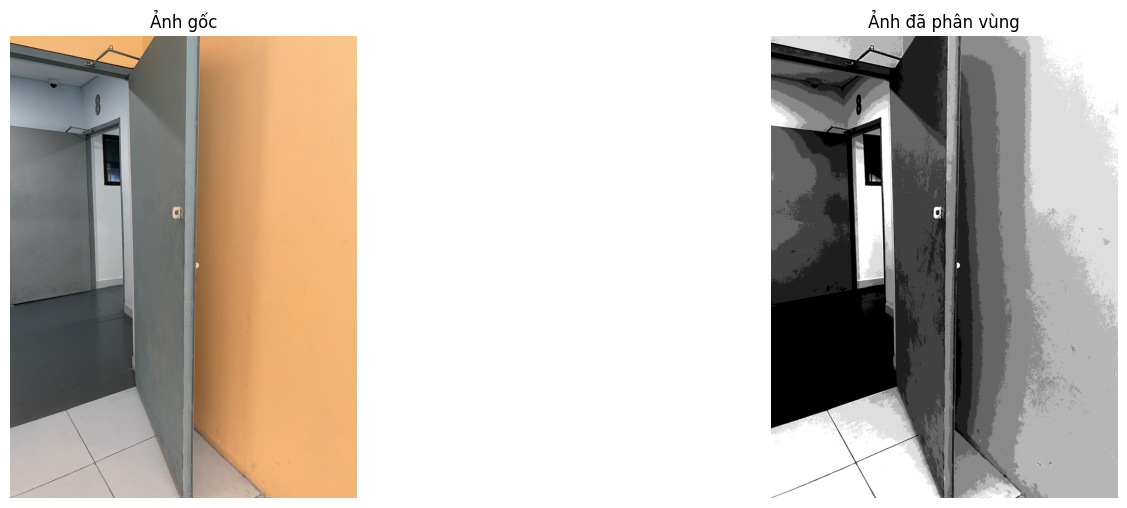

In [ ]:
#Phân vùng cho ảnh hình 1 :
print('Ảnh phân vùng của hình 1 :\n')
seg_img1 = PhanVungAnh(hinh1)
HienThiAnh(hinh1 , seg_img1)

#Phân vùng cho ảnh hình 2 :
print('\nẢnh phân vùng của hình 2 :\n')
seg_img2 = PhanVungAnh(hinh2)
HienThiAnh(hinh2 , seg_img2)

#Phân vùng cho ảnh hình 3 :
print('\nẢnh phân vùng của hình 3 :\n')
seg_img3 = PhanVungAnh(hinh3)
HienThiAnh(hinh3 , seg_img1)

#Phân vùng cho ảnh hình 4 :
print('\nẢnh phân vùng của hình 4 :\n')
seg_img4 = PhanVungAnh(hinh4)
HienThiAnh(hinh4 , seg_img4)

#Phân vùng cho ảnh hình 5 :
print('\nẢnh phân vùng của hình 5 :\n')
seg_img5 = PhanVungAnh(hinh5)
HienThiAnh(hinh5 , seg_img5)